In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from local_explanations import *
import utils
import models
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import torch
import torch_geometric.transforms as T
from torch_geometric.utils import from_networkx, to_networkx

%load_ext autoreload
%autoreload 2

### Read hyper-parameters and data

In [2]:
DATASET_NAME = "BAMultiShapes"

with open("../config/" + DATASET_NAME + "_params.json") as json_file:
    hyper_params = json.load(json_file)

In [3]:
adjs_train , \
edge_weights_train , \
ori_classes_train , \
belonging_train , \
summary_predictions_train , \
le_classes_train = read_bamultishapes(evaluate_method=False, 
                                      remove_mix=False, 
                                      min_num_include=5, 
                                      split="TRAIN")

In [4]:
adjs_val , \
edge_weights_val , \
ori_classes_val , \
belonging_val , \
summary_predictions_val , \
le_classes_val = read_bamultishapes(evaluate_method=False, 
                                     remove_mix=False, 
                                     min_num_include=5, 
                                     split="VAL")

In [5]:
adjs_test , \
edge_weights_test , \
ori_classes_test , \
belonging_test , \
summary_predictions_test , \
le_classes_test = read_bamultishapes(evaluate_method=False, 
                                      remove_mix=False, 
                                      min_num_include=5, 
                                      split="TEST")

### dataset

In [6]:
device = "cpu" #torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = T.Compose([
    T.NormalizeFeatures(),
])     


dataset_train = utils.LocalExplanationsDataset("", adjs_train, "same", transform=transform, y=le_classes_train, belonging=belonging_train, task_y=ori_classes_train)
dataset_val   = utils.LocalExplanationsDataset("", adjs_val, "same", transform=transform, y=le_classes_val, belonging=belonging_val, task_y=ori_classes_val)
dataset_test  = utils.LocalExplanationsDataset("", adjs_test, "same", transform=transform, y=le_classes_test, belonging=belonging_test, task_y=ori_classes_test)

C:\Users\Steve\Desktop\GNN\gnn_logic_global_expl\code\utils.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_attr=torch.tensor(t.weight).reshape(-1, 1),


### Train GLGExplainer

(array([0., 1., 2., 3., 4., 5., 6., 7.], dtype=float32), array([121, 162, 157, 251,  78, 102,  73,  26], dtype=int64))


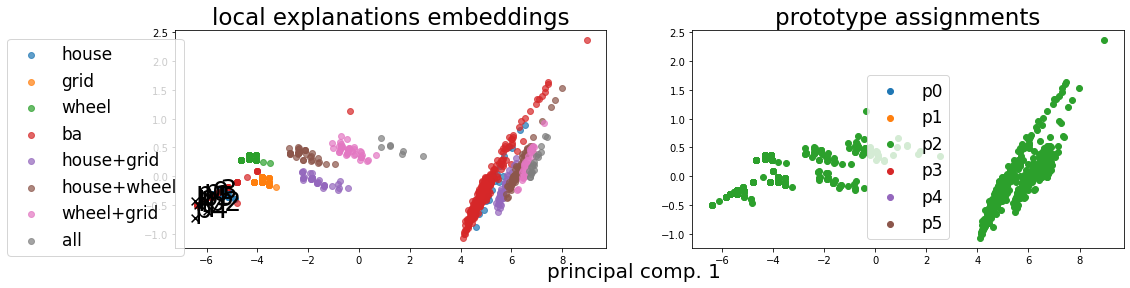

Alpha norms:
tensor([[0.9595, 1.0000, 0.9094, 0.7717, 0.9062, 0.8726],
        [0.8822, 0.8649, 0.8276, 1.0000, 0.9040, 0.7665]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.258763 +- 0.000000
Concept distribution:  (array([2], dtype=int64), array([970], dtype=int64))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)

  1: Loss: 0.24247, LEN: 0.088341, AccxC: 0.48, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.24807, V. LEN 0.10
  2: Loss: 0.18472, LEN: 0.087954, AccxC: 0.54, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.19910, V. LEN 0.10
  3: Loss: 0.14765, LEN: 0.087587, AccxC: 0.54, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.18689, V. LEN 0.10
  4: Loss: 0.14446, LEN: 0.087135, AccxC: 0.51, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.17576, V. LEN 0.10
  5: Loss: 0.13422, LEN: 0.086768, AccxC: 0.50, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.16677, V. LEN 0.10
  6: Loss: 0.12541, LEN: 0.086424, AccxC: 0.52, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.16157, V.

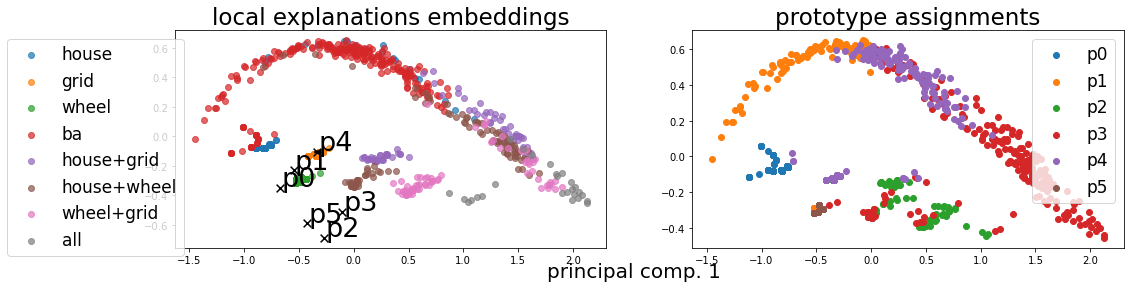

Alpha norms:
tensor([[0.9819, 1.0000, 0.9704, 0.8777, 0.9679, 0.9615],
        [1.0000, 0.6583, 0.7893, 0.9588, 0.8183, 0.7872]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.626616 +- 0.227373
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([133, 113, 119, 224, 240, 141], dtype=int64))
Logic formulas:
For class 0:
0.0 ()
For class 1:
0.0 ()
Accuracy as classifier:  0.0
LEN fidelity:  tensor(0.)


 20: Loss: 0.09804, LEN: 0.080409, AccxC: 0.60, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.12829, V. LEN 0.09
 21: Loss: 0.09388, LEN: 0.079907, AccxC: 0.65, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.12776, V. LEN 0.09
 22: Loss: 0.09444, LEN: 0.079457, AccxC: 0.63, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.12282, V. LEN 0.09
 23: Loss: 0.09229, LEN: 0.078941, AccxC: 0.64, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.12026, V. LEN 0.09
 24: Loss: 0.09234, LEN: 0.078494, AccxC: 0.63, AccO: 0.00, V. Acc: 0.00, V. Loss: 0.11622, V. LEN 0.09
 25: Loss: 0.09139, LEN: 0.078024, AccxC: 0.62, AccO:

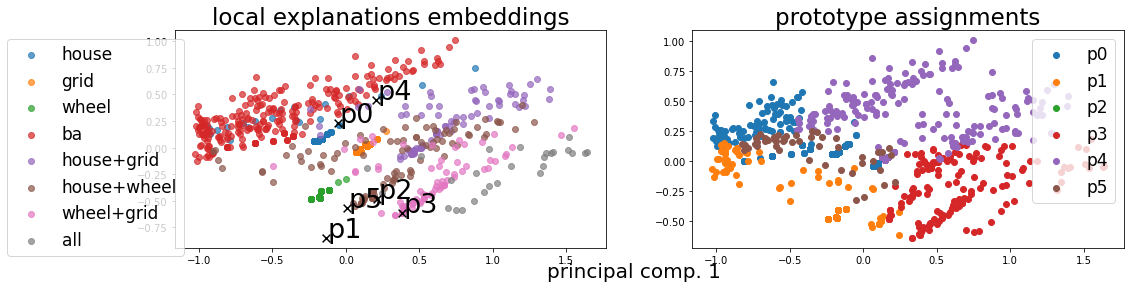

Alpha norms:
tensor([[0.7070, 0.8274, 0.7442, 1.0000, 0.7442, 0.6615],
        [0.7174, 0.3635, 1.0000, 0.8416, 0.6732, 0.6388]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.477599 +- 0.136439
Concept distribution:  (array([0, 1, 3, 4, 5], dtype=int64), array([322, 220, 153, 225,  50], dtype=int64))
Logic formulas:
For class 0:
0.51875 (feature001) | (feature000 & feature001)
For class 1:
0.6025 (feature000) | (feature003) | (feature004) | (feature005) | (feature004 & feature000) | (feature005 & feature004) | (feature005 & feature000) | (feature000 & feature003) | ((feature001 & feature004) | ((feature001 & feature000) | ((feature001 & feature003) | (feature004 & feature003)

------------------------------------------------------------------------------------
Has double activations  tensor(69)
But only for wrong predictions

Accuracy as classifier:  0.5175
LEN fidelity:  tensor(0.4762)


 40: Loss: 0.08134, LEN: 0.072785, AccxC: 0.62, AccO: 0.62, V. Acc: 0.54, V. Loss: 0.10410, V.

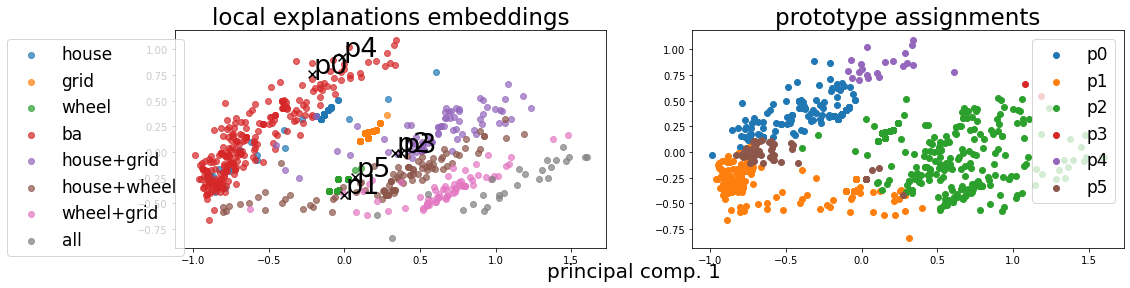

Alpha norms:
tensor([[0.3767, 0.4678, 0.5321, 1.0000, 0.3836, 0.3300],
        [0.2602, 0.1921, 0.9592, 1.0000, 0.3640, 0.2741]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.661980 +- 0.229950
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([206, 282, 395,   2,  21,  64], dtype=int64))
Logic formulas:
For class 0:
0.82125 (feature001) | (feature000) | (feature000 & feature001) | ((feature005)
For class 1:
0.795 (feature002) | (feature005) | (feature000 & feature002) | (feature000 & feature005) | (feature005 & feature002) | ((feature001 & feature002) | (feature003)

------------------------------------------------------------------------------------
Has double activations  tensor(48)
But only for wrong predictions

Accuracy as classifier:  0.765
LEN fidelity:  tensor(0.7600)


------------------------------------------------------------------------------------
Has double activations  tensor(5)
But only for wrong predictions


 60: Loss: 0.07024, LEN: 0.065292,

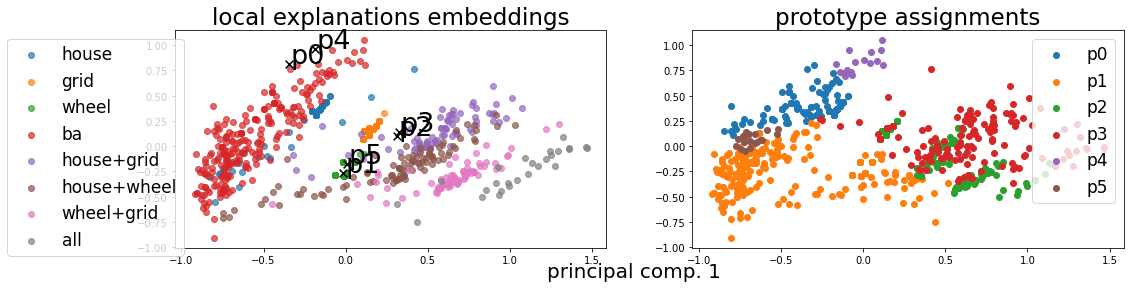

Alpha norms:
tensor([[0.2974, 0.3008, 0.5594, 1.0000, 0.2881, 0.2586],
        [0.1227, 0.0920, 0.8350, 1.0000, 0.2128, 0.1557]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.645786 +- 0.266649
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([179, 366, 223, 165,  17,  20], dtype=int64))
Logic formulas:
For class 0:
0.81125 (feature001) | (feature000) | (feature000 & feature001) | ((feature005)
For class 1:
0.8325 (feature002) | (feature003) | (feature000 & feature002) | (feature000 & feature003) | ((feature001 & feature002) | ((feature001 & feature003)
Accuracy as classifier:  0.8112
LEN fidelity:  tensor(0.7862)


 80: Loss: 0.06028, LEN: 0.056631, AccxC: 0.75, AccO: 0.69, V. Acc: 0.78, V. Loss: 0.07098, V. LEN 0.06
 81: Loss: 0.06066, LEN: 0.057246, AccxC: 0.75, AccO: 0.71, V. Acc: 0.84, V. Loss: 0.06254, V. LEN 0.06
 82: Loss: 0.05720, LEN: 0.053716, AccxC: 0.76, AccO: 0.74, V. Acc: 0.83, V. Loss: 0.06537, V. LEN 0.06
 83: Loss: 0.06000, LEN: 0.057139, Accx

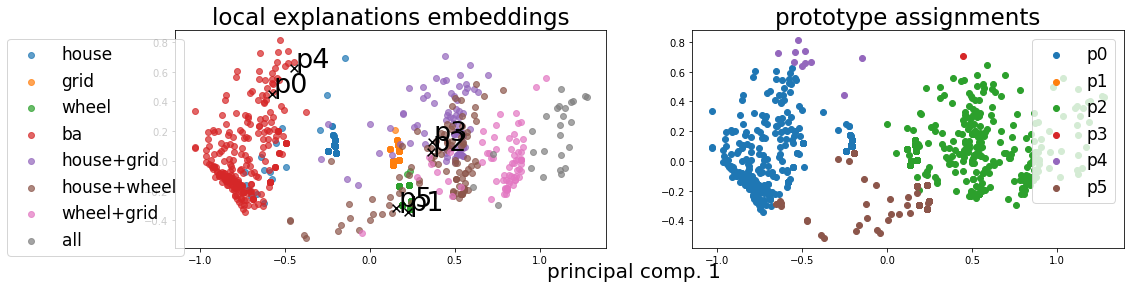

Alpha norms:
tensor([[0.3020, 0.2560, 0.5947, 1.0000, 0.2987, 0.2789],
        [0.1121, 0.0874, 0.8217, 1.0000, 0.1461, 0.1551]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.732570 +- 0.198450
Concept distribution:  (array([0, 2, 3, 4, 5], dtype=int64), array([339, 418,   1,  10, 202], dtype=int64))
Logic formulas:
For class 0:
0.8725 (feature000) | (feature005) | (feature005 & feature000) | (feature004)
For class 1:
0.8875 (feature002) | (feature005) | (feature000 & feature002) | (feature005 & feature002) | (feature000 & feature005) | (feature003)

------------------------------------------------------------------------------------
Has double activations  tensor(112)
But only for wrong predictions

Accuracy as classifier:  0.81
LEN fidelity:  tensor(0.7975)


------------------------------------------------------------------------------------
Has double activations  tensor(12)
But only for wrong predictions


100: Loss: 0.05564, LEN: 0.052724, AccxC: 0.75, AccO: 0.66, V. Acc: 0.7

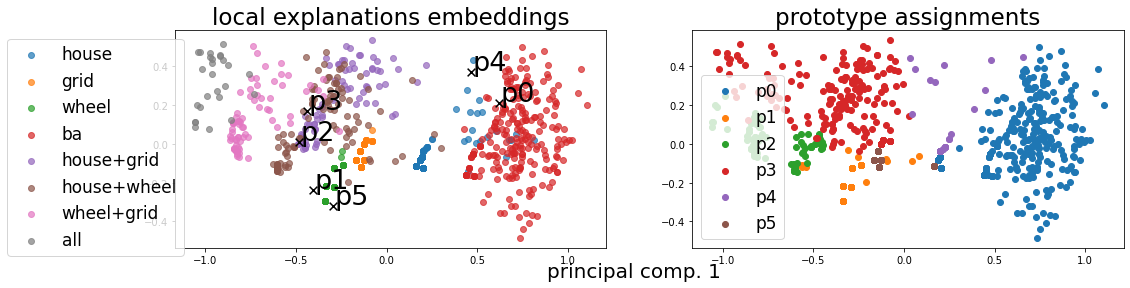

Alpha norms:
tensor([[0.3682, 0.3062, 0.6559, 1.0000, 0.3171, 0.3496],
        [0.1328, 0.1222, 1.0000, 0.9434, 0.1391, 0.1872]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.672594 +- 0.227141
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([332, 165,  95, 192,  28, 158], dtype=int64))
Logic formulas:
For class 0:
0.89125 (feature000) | ((feature001) | ((feature001 & feature000) | (feature004)
For class 1:
0.89125 (feature002) | (feature005) | (feature003) | (feature000 & feature005) | (feature000 & feature003) | (feature004 & feature003) | (feature005 & feature003) | (feature004 & feature005) | (feature005 & feature002) | (feature003 & feature002) | ((feature001 & feature005) | ((feature001 & feature003) | ((feature001 & feature004) | ((feature001 & feature002) | (feature000 & feature002)
Accuracy as classifier:  0.8912
LEN fidelity:  tensor(0.8913)


120: Loss: 0.04447, LEN: 0.041486, AccxC: 0.84, AccO: 0.85, V. Acc: 0.93, V. Loss: 0.03516, V. LEN 0.03
121:

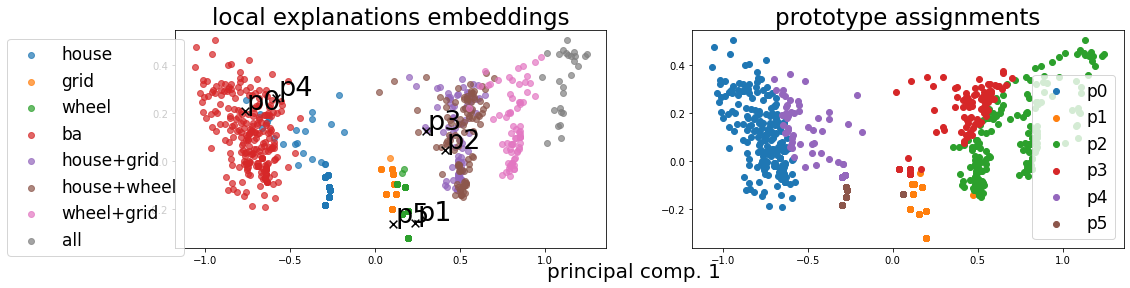

Alpha norms:
tensor([[0.4731, 0.3642, 0.8916, 1.0000, 0.3590, 0.4168],
        [0.1069, 0.1118, 1.0000, 0.6658, 0.1307, 0.1456]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.608072 +- 0.231459
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([219, 280, 193, 110,  69,  99], dtype=int64))
Logic formulas:
For class 0:
0.91375 (feature000) | (feature001) | ((feature004)
For class 1:
0.91375 (feature002) | (feature005) | (feature003) | (feature001 & feature005) | (feature001 & feature003) | (feature005 & feature003) | (feature004 & feature003) | (feature001 & feature004) | (feature001 & feature002) | (feature005 & feature002) | (feature003 & feature002)
Accuracy as classifier:  0.9138
LEN fidelity:  tensor(0.9137)


140: Loss: 0.03162, LEN: 0.029588, AccxC: 0.88, AccO: 0.87, V. Acc: 0.93, V. Loss: 0.02616, V. LEN 0.02
141: Loss: 0.03132, LEN: 0.029428, AccxC: 0.88, AccO: 0.88, V. Acc: 0.94, V. Loss: 0.02911, V. LEN 0.02
142: Loss: 0.03642, LEN: 0.034263, AccxC: 0.8

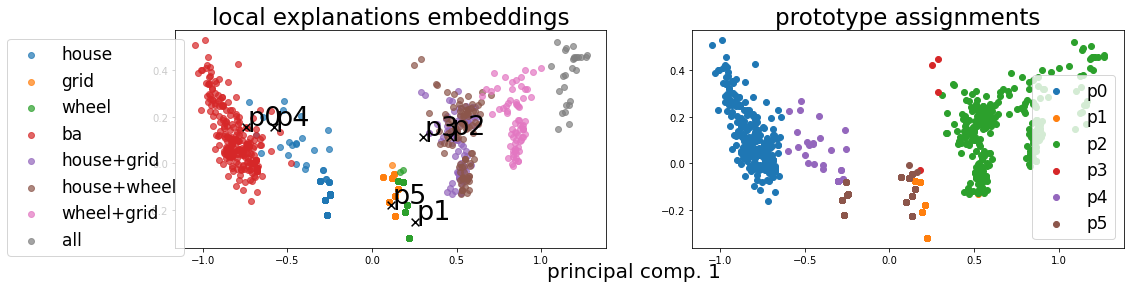

Alpha norms:
tensor([[0.4971, 0.3566, 1.0000, 0.8274, 0.3179, 0.4517],
        [0.0914, 0.1007, 1.0000, 0.4413, 0.0998, 0.1262]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.725918 +- 0.242331
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([251, 156, 275,   4,  32, 252], dtype=int64))
Logic formulas:
For class 0:
0.935 (feature000) | (feature001) | ((feature004)
For class 1:
0.935 (feature005) | (feature002) | (feature003) | (feature001 & feature005) | (feature004 & feature001) | (feature005 & feature003) | (feature004 & feature005) | (feature005 & feature002) | (feature001 & feature002)
Accuracy as classifier:  0.935
LEN fidelity:  tensor(0.9350)


160: Loss: 0.02759, LEN: 0.026179, AccxC: 0.89, AccO: 0.89, V. Acc: 0.95, V. Loss: 0.01832, V. LEN 0.02
161: Loss: 0.02508, LEN: 0.023575, AccxC: 0.91, AccO: 0.91, V. Acc: 0.86, V. Loss: 0.03611, V. LEN 0.03
162: Loss: 0.02523, LEN: 0.023656, AccxC: 0.92, AccO: 0.92, V. Acc: 0.93, V. Loss: 0.02270, V. LEN 0.02
16

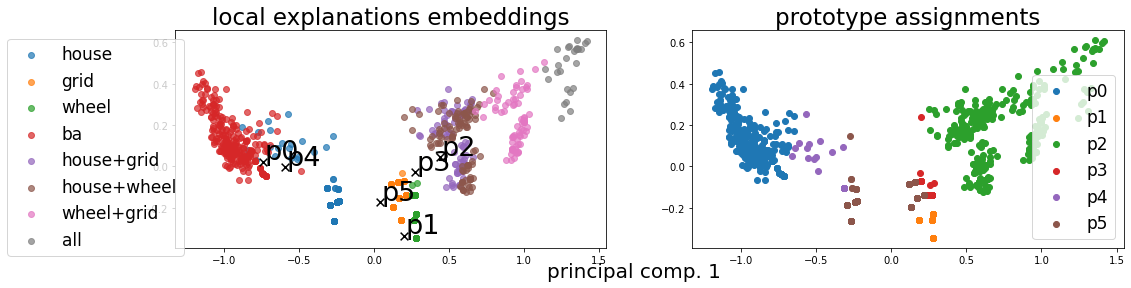

Alpha norms:
tensor([[0.4608, 0.3204, 1.0000, 0.6441, 0.2668, 0.4131],
        [0.0815, 0.0949, 1.0000, 0.3382, 0.0789, 0.1128]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.726046 +- 0.215482
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([257, 173, 278,  34,  21, 207], dtype=int64))
Logic formulas:
For class 0:
0.93875 (feature000) | (feature001) | ((feature004)
For class 1:
0.93875 (feature005) | (feature002) | (feature003) | (feature001 & feature005) | (feature005 & feature003) | (feature001 & feature003) | (feature005 & feature002) | (feature001 & feature002) | ((feature004 & feature003) | ((feature004 & feature001) | (feature003 & feature002)
Accuracy as classifier:  0.9388
LEN fidelity:  tensor(0.9388)


180: Loss: 0.02063, LEN: 0.019151, AccxC: 0.91, AccO: 0.91, V. Acc: 0.92, V. Loss: 0.02081, V. LEN 0.02
181: Loss: 0.02081, LEN: 0.019365, AccxC: 0.93, AccO: 0.93, V. Acc: 0.82, V. Loss: 0.03673, V. LEN 0.03
182: Loss: 0.02235, LEN: 0.021060, AccxC: 0

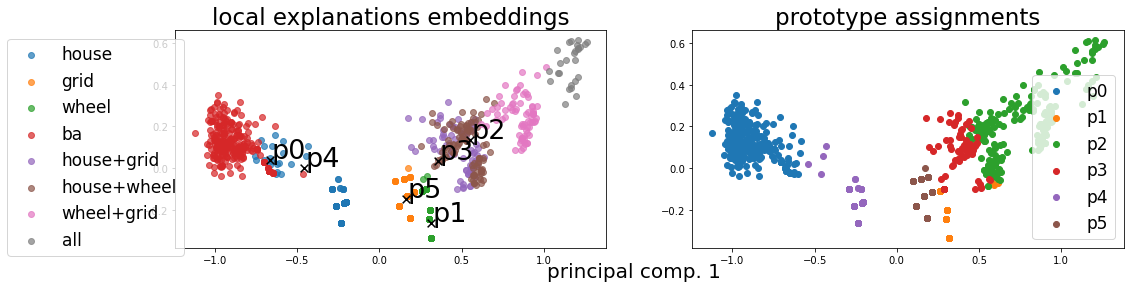

Alpha norms:
tensor([[0.4424, 0.3034, 1.0000, 0.5845, 0.2342, 0.3926],
        [0.0768, 0.0956, 1.0000, 0.2910, 0.0792, 0.0986]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.779473 +- 0.276103
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([267, 146, 213,  77, 105, 162], dtype=int64))
Logic formulas:
For class 0:
0.94125 (feature001) | (feature000) | ((feature004)
For class 1:
0.94125 (feature002) | (feature003) | (feature005) | (feature004 & feature005) | (feature001 & feature005) | (feature004 & feature001) | (feature004 & feature003) | (feature005 & feature003) | (feature004 & feature002) | (feature001 & feature002) | (feature001 & feature003) | (feature003 & feature002) | (feature005 & feature002)
Accuracy as classifier:  0.9412
LEN fidelity:  tensor(0.9413)


200: Loss: 0.01953, LEN: 0.018687, AccxC: 0.93, AccO: 0.93, V. Acc: 0.94, V. Loss: 0.01645, V. LEN 0.01
201: Loss: 0.01948, LEN: 0.018443, AccxC: 0.93, AccO: 0.93, V. Acc: 0.87, V. Loss: 0.02866, V

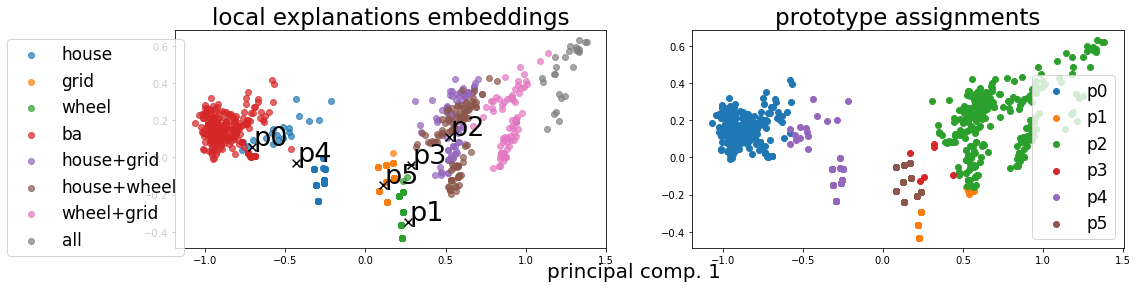

Alpha norms:
tensor([[0.4451, 0.3156, 1.0000, 0.5637, 0.2434, 0.4137],
        [0.0784, 0.1005, 1.0000, 0.2634, 0.0946, 0.1032]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.745983 +- 0.289131
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([256, 137, 270,   6, 116, 185], dtype=int64))
Logic formulas:
For class 0:
0.96125 (feature001) | (feature000) | (feature005) | ((feature004)
For class 1:
0.96125 (feature002) | (feature003) | (feature004 & feature005) | (feature001 & feature005) | (feature004 & feature001) | (feature005 & feature003) | (feature004 & feature002) | (feature001 & feature002) | (feature005 & feature002) | (feature001 & feature003)
Accuracy as classifier:  0.9612
LEN fidelity:  tensor(0.9613)


220: Loss: 0.02078, LEN: 0.019785, AccxC: 0.93, AccO: 0.93, V. Acc: 0.96, V. Loss: 0.01407, V. LEN 0.01
221: Loss: 0.01790, LEN: 0.017156, AccxC: 0.94, AccO: 0.94, V. Acc: 0.95, V. Loss: 0.01685, V. LEN 0.02
222: Loss: 0.01666, LEN: 0.015791, AccxC: 0.9

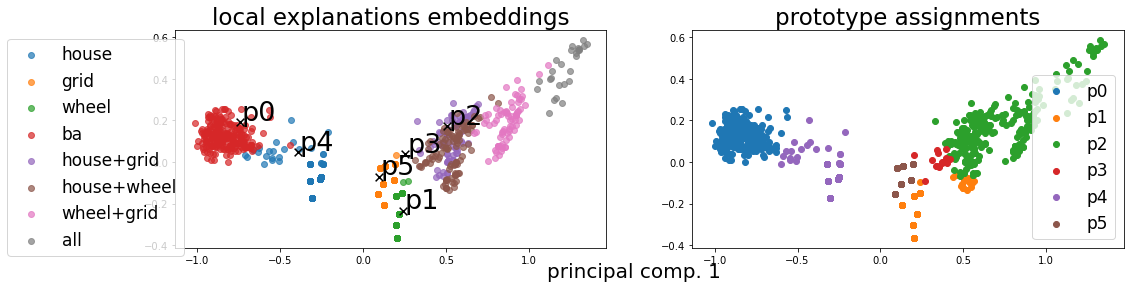

Alpha norms:
tensor([[0.4182, 0.3079, 1.0000, 0.5088, 0.2374, 0.3987],
        [0.0762, 0.1071, 1.0000, 0.2342, 0.1028, 0.0965]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.789330 +- 0.246070
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([255, 215, 249,  15, 117, 119], dtype=int64))
Logic formulas:
For class 0:
0.95125 (feature001) | (feature000) | (feature005) | ((feature004)
For class 1:
0.95125 (feature002) | (feature003) | (feature005 & feature004) | (feature004 & feature001) | (feature005 & feature001) | (feature005 & feature003) | (feature004 & feature002) | (feature001 & feature002) | (feature005 & feature002)
Accuracy as classifier:  0.9512
LEN fidelity:  tensor(0.9513)


240: Loss: 0.01631, LEN: 0.015645, AccxC: 0.96, AccO: 0.96, V. Acc: 0.89, V. Loss: 0.02742, V. LEN 0.03
241: Loss: 0.01605, LEN: 0.015399, AccxC: 0.95, AccO: 0.95, V. Acc: 0.97, V. Loss: 0.01175, V. LEN 0.01
242: Loss: 0.01478, LEN: 0.014139, AccxC: 0.96, AccO: 0.96, V. Acc: 0.96,

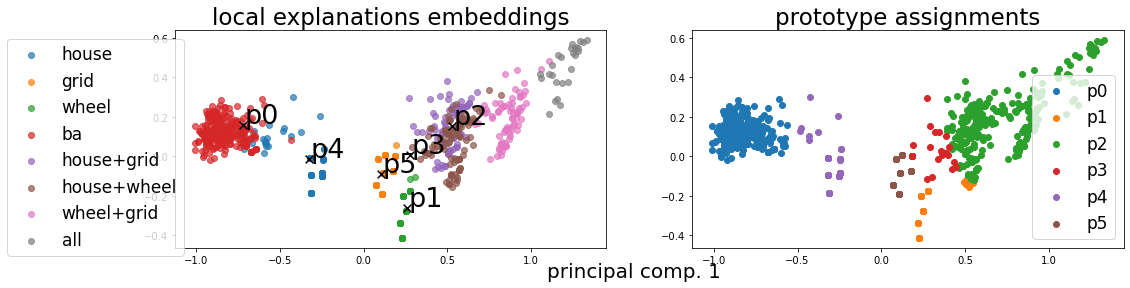

Alpha norms:
tensor([[0.4118, 0.3154, 1.0000, 0.4930, 0.2420, 0.4053],
        [0.0761, 0.1168, 1.0000, 0.2230, 0.1097, 0.0968]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.768742 +- 0.290696
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([264, 162, 255,  26, 108, 155], dtype=int64))
Logic formulas:
For class 0:
0.97375 (feature001) | (feature000) | (feature005) | ((feature004)
For class 1:
0.97375 (feature002) | (feature003) | (feature005 & feature004) | (feature005 & feature001) | (feature004 & feature001) | (feature001 & feature003) | (feature004 & feature003) | (feature005 & feature003) | (feature004 & feature002) | (feature001 & feature002) | (feature005 & feature002)
Accuracy as classifier:  0.9738
LEN fidelity:  tensor(0.9737)


260: Loss: 0.01362, LEN: 0.012935, AccxC: 0.96, AccO: 0.96, V. Acc: 0.97, V. Loss: 0.01162, V. LEN 0.01
261: Loss: 0.01345, LEN: 0.012951, AccxC: 0.97, AccO: 0.97, V. Acc: 0.96, V. Loss: 0.01367, V. LEN 0.01
262: Loss: 0.0143

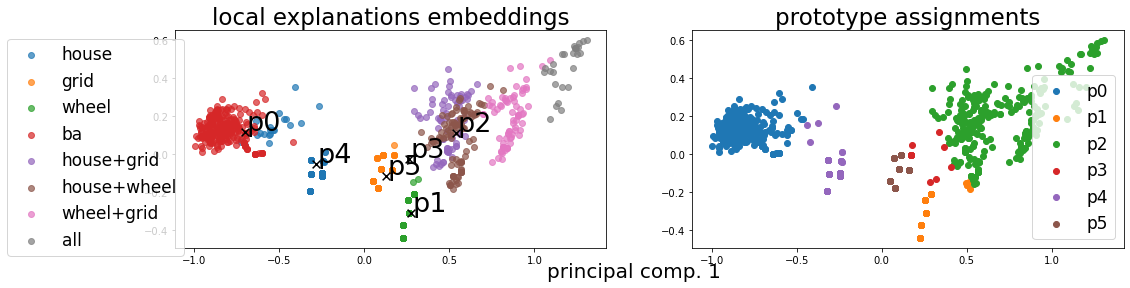

Alpha norms:
tensor([[0.3924, 0.3233, 1.0000, 0.4613, 0.2477, 0.4114],
        [0.0751, 0.1249, 1.0000, 0.2059, 0.1170, 0.0995]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.803503 +- 0.249128
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([267, 161, 270,  12, 105, 155], dtype=int64))
Logic formulas:
For class 0:
0.9725 (feature000) | (feature005) | (feature001) | ((feature004)
For class 1:
0.9725 (feature002) | (feature003) | (feature005 & feature004) | (feature005 & feature001) | (feature004 & feature001) | (feature001 & feature003) | (feature004 & feature003) | (feature005 & feature003) | (feature004 & feature002) | (feature001 & feature002) | (feature005 & feature002)
Accuracy as classifier:  0.9725
LEN fidelity:  tensor(0.9725)


280: Loss: 0.01467, LEN: 0.014217, AccxC: 0.96, AccO: 0.96, V. Acc: 0.98, V. Loss: 0.00913, V. LEN 0.01
281: Loss: 0.01382, LEN: 0.013303, AccxC: 0.95, AccO: 0.95, V. Acc: 0.96, V. Loss: 0.01371, V. LEN 0.01
282: Loss: 0.01266,

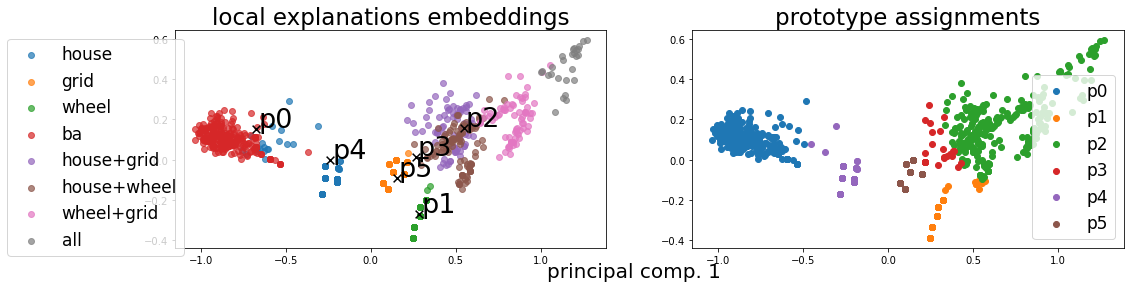

Alpha norms:
tensor([[0.3958, 0.3365, 1.0000, 0.4478, 0.2616, 0.4230],
        [0.0770, 0.1357, 1.0000, 0.1963, 0.1268, 0.1039]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.767792 +- 0.285667
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([268, 165, 253,  25, 104, 155], dtype=int64))
Logic formulas:
For class 0:
0.9725 (feature001) | (feature000) | (feature005) | ((feature004)
For class 1:
0.9725 (feature002) | (feature003) | (feature005 & feature004) | (feature005 & feature001) | (feature004 & feature001) | (feature001 & feature003) | (feature004 & feature003) | (feature004 & feature002) | (feature001 & feature002) | (feature005 & feature002)
Accuracy as classifier:  0.9725
LEN fidelity:  tensor(0.9725)


300: Loss: 0.01361, LEN: 0.013212, AccxC: 0.96, AccO: 0.96, V. Acc: 0.96, V. Loss: 0.01263, V. LEN 0.01
301: Loss: 0.01247, LEN: 0.012017, AccxC: 0.96, AccO: 0.96, V. Acc: 0.98, V. Loss: 0.00908, V. LEN 0.01
302: Loss: 0.01019, LEN: 0.009678, AccxC: 0.97,

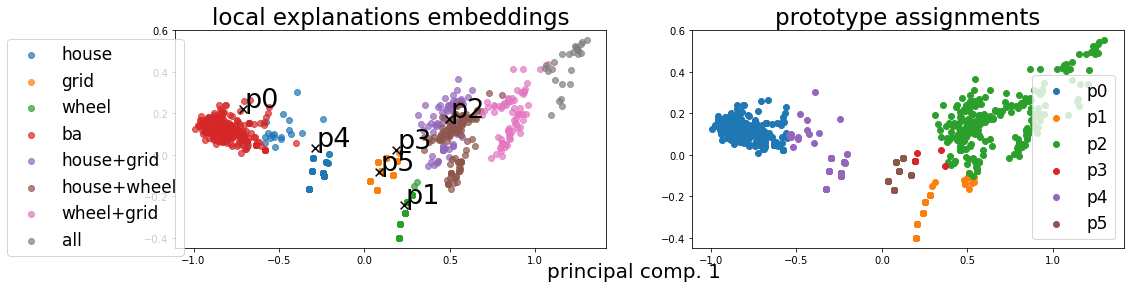

Alpha norms:
tensor([[0.4216, 0.3686, 1.0000, 0.4423, 0.2870, 0.4491],
        [0.0830, 0.1578, 1.0000, 0.1990, 0.1405, 0.1134]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.833118 +- 0.235724
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([257, 170, 264,   9, 115, 155], dtype=int64))
Logic formulas:
For class 0:
0.96875 (feature001) | (feature000) | (feature005) | ((feature004)
For class 1:
0.96875 (feature002) | (feature003) | (feature005 & feature004) | (feature005 & feature001) | (feature004 & feature001) | (feature001 & feature003) | (feature004 & feature003) | (feature004 & feature002) | (feature001 & feature002) | (feature005 & feature002)
Accuracy as classifier:  0.9688
LEN fidelity:  tensor(0.9688)


320: Loss: 0.01265, LEN: 0.012170, AccxC: 0.96, AccO: 0.96, V. Acc: 0.97, V. Loss: 0.01198, V. LEN 0.01
321: Loss: 0.01204, LEN: 0.011599, AccxC: 0.96, AccO: 0.96, V. Acc: 0.98, V. Loss: 0.00953, V. LEN 0.01
322: Loss: 0.01314, LEN: 0.012610, AccxC: 0.9

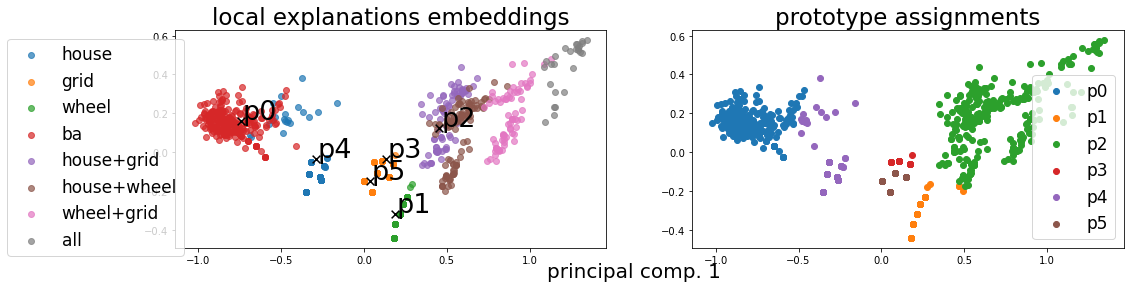

Alpha norms:
tensor([[0.4344, 0.3773, 1.0000, 0.4364, 0.2918, 0.4511],
        [0.0873, 0.1693, 1.0000, 0.2012, 0.1546, 0.1142]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.882598 +- 0.235585
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([257, 161, 275,  24, 115, 138], dtype=int64))
Logic formulas:
For class 0:
0.97625 (feature000) | (feature005) | (feature001) | ((feature004)
For class 1:
0.97625 (feature002) | (feature005 & feature004) | (feature005 & feature001) | (feature001 & feature003) | (feature004 & feature003) | (feature004 & feature001) | (feature004 & feature002) | (feature001 & feature002) | (feature003 & feature002) | (feature003)
Accuracy as classifier:  0.9762
LEN fidelity:  tensor(0.9762)


340: Loss: 0.01103, LEN: 0.010595, AccxC: 0.97, AccO: 0.97, V. Acc: 0.98, V. Loss: 0.00910, V. LEN 0.01
341: Loss: 0.01059, LEN: 0.010185, AccxC: 0.96, AccO: 0.96, V. Acc: 0.96, V. Loss: 0.01677, V. LEN 0.02
342: Loss: 0.01203, LEN: 0.011621, AccxC: 0.9

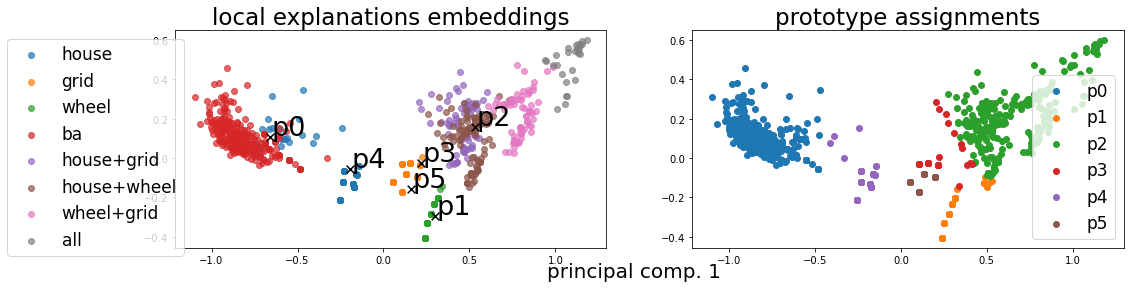

Alpha norms:
tensor([[0.4307, 0.3777, 1.0000, 0.4010, 0.2891, 0.4483],
        [0.0863, 0.1751, 1.0000, 0.1816, 0.1561, 0.1145]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.819484 +- 0.236371
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([267, 163, 262,  35, 105, 138], dtype=int64))
Logic formulas:
For class 0:
0.965 (feature001) | (feature000) | (feature005) | ((feature004) | (feature003)
For class 1:
0.965 (feature002) | (feature005 & feature004) | (feature005 & feature001) | (feature001 & feature003) | (feature004 & feature003) | (feature004 & feature001) | (feature005 & feature003) | (feature004 & feature002) | (feature001 & feature002) | (feature003 & feature002)
Accuracy as classifier:  0.965
LEN fidelity:  tensor(0.9650)


360: Loss: 0.00970, LEN: 0.009300, AccxC: 0.97, AccO: 0.97, V. Acc: 0.96, V. Loss: 0.01206, V. LEN 0.01
361: Loss: 0.01319, LEN: 0.012836, AccxC: 0.96, AccO: 0.96, V. Acc: 0.96, V. Loss: 0.01217, V. LEN 0.01
362: Loss: 0.01252, LE

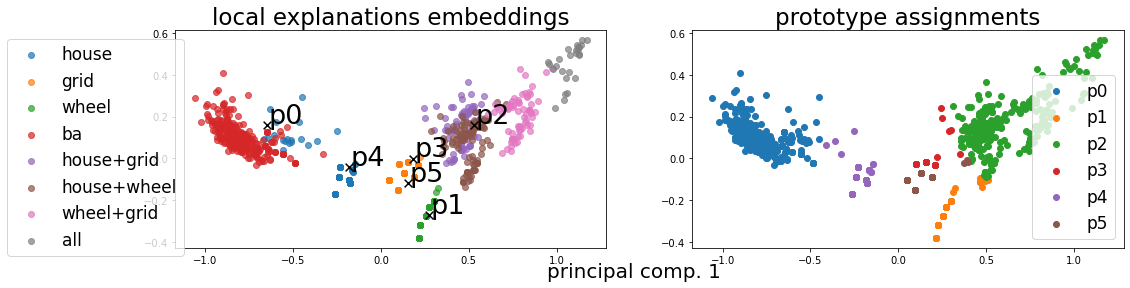

Alpha norms:
tensor([[0.4358, 0.3809, 1.0000, 0.3999, 0.2915, 0.4525],
        [0.0897, 0.1843, 1.0000, 0.1920, 0.1641, 0.1174]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.840451 +- 0.224707
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([267, 164, 264,  29, 105, 141], dtype=int64))
Logic formulas:
For class 0:
0.9675 (feature001) | (feature000) | (feature005) | ((feature004) | (feature003)
For class 1:
0.9675 (feature002) | (feature005 & feature004) | (feature005 & feature001) | (feature001 & feature003) | (feature004 & feature003) | (feature004 & feature001) | (feature004 & feature002) | (feature001 & feature002) | (feature003 & feature002)
Accuracy as classifier:  0.9675
LEN fidelity:  tensor(0.9675)


380: Loss: 0.01065, LEN: 0.010352, AccxC: 0.97, AccO: 0.97, V. Acc: 0.95, V. Loss: 0.01648, V. LEN 0.02
381: Loss: 0.01209, LEN: 0.011704, AccxC: 0.96, AccO: 0.96, V. Acc: 0.96, V. Loss: 0.01230, V. LEN 0.01
382: Loss: 0.00999, LEN: 0.009601, AccxC: 0.97,

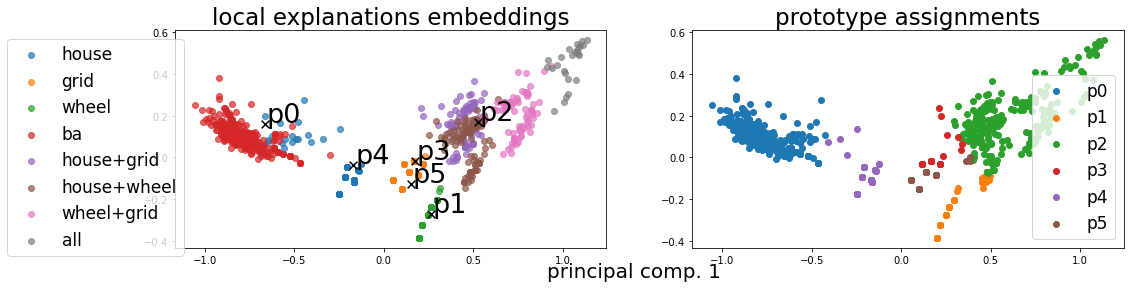

Alpha norms:
tensor([[0.4313, 0.3865, 1.0000, 0.3830, 0.2931, 0.4597],
        [0.0915, 0.1945, 1.0000, 0.1864, 0.1738, 0.1227]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.830685 +- 0.228696
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([267, 167, 260,  30, 105, 141], dtype=int64))
Logic formulas:
For class 0:
0.965 (feature001) | (feature000) | (feature005) | ((feature004) | (feature003)
For class 1:
0.965 (feature002) | (feature005 & feature004) | (feature005 & feature001) | (feature003 & feature001) | (feature004 & feature003) | (feature004 & feature001) | (feature004 & feature002) | (feature001 & feature002) | (feature003 & feature002)
Accuracy as classifier:  0.965
LEN fidelity:  tensor(0.9650)


400: Loss: 0.01018, LEN: 0.009863, AccxC: 0.97, AccO: 0.97, V. Acc: 0.95, V. Loss: 0.01492, V. LEN 0.01
401: Loss: 0.00918, LEN: 0.008915, AccxC: 0.97, AccO: 0.97, V. Acc: 0.97, V. Loss: 0.01146, V. LEN 0.01
402: Loss: 0.00975, LEN: 0.009406, AccxC: 0.97, Ac

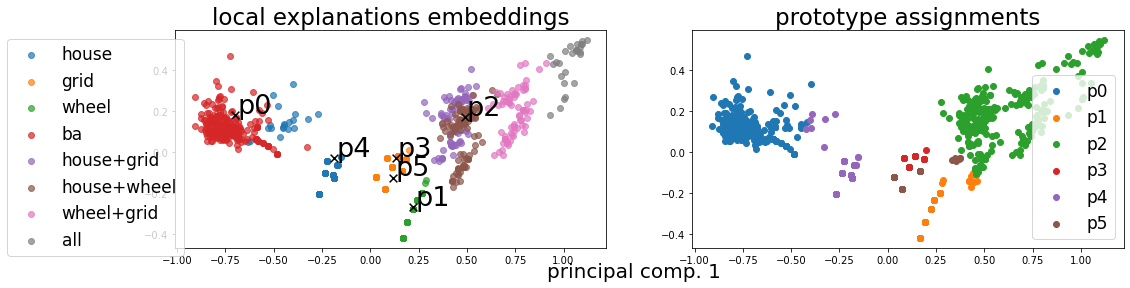

Alpha norms:
tensor([[0.4605, 0.4204, 1.0000, 0.4180, 0.3150, 0.4941],
        [0.1008, 0.2216, 1.0000, 0.2095, 0.1959, 0.1342]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.862628 +- 0.229405
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([264, 166, 264,  68, 108, 100], dtype=int64))
Logic formulas:
For class 0:
0.9725 (feature001) | (feature000) | (feature005) | ((feature004) | (feature003)
For class 1:
0.9725 (feature002) | (feature004 & feature003) | (feature005 & feature004) | (feature005 & feature001) | (feature003 & feature001) | (feature004 & feature001) | (feature004 & feature002) | (feature001 & feature002) | (feature003 & feature002)
Accuracy as classifier:  0.9725
LEN fidelity:  tensor(0.9725)


420: Loss: 0.01248, LEN: 0.012132, AccxC: 0.97, AccO: 0.97, V. Acc: 0.96, V. Loss: 0.01251, V. LEN 0.01
421: Loss: 0.01066, LEN: 0.010334, AccxC: 0.97, AccO: 0.98, V. Acc: 0.96, V. Loss: 0.01432, V. LEN 0.01
422: Loss: 0.01176, LEN: 0.011435, AccxC: 0.96,

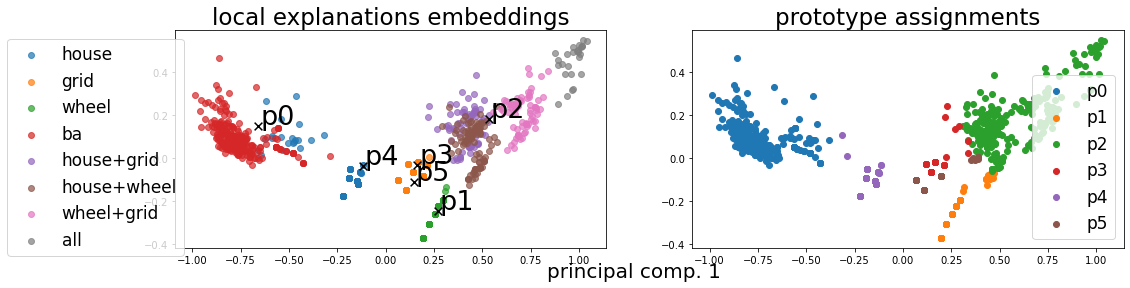

Alpha norms:
tensor([[0.4239, 0.3897, 1.0000, 0.3882, 0.2962, 0.4617],
        [0.0951, 0.2099, 1.0000, 0.1997, 0.1829, 0.1264]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.844167 +- 0.223778
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([269, 167, 257,  74, 103, 100], dtype=int64))
Logic formulas:
For class 0:
0.96375 (feature001) | (feature000) | (feature005) | ((feature004) | (feature003)
For class 1:
0.96375 (feature002) | (feature004 & feature003) | (feature005 & feature004) | (feature005 & feature001) | (feature003 & feature001) | (feature004 & feature001) | (feature004 & feature002) | (feature001 & feature002) | (feature003 & feature002)
Accuracy as classifier:  0.9638
LEN fidelity:  tensor(0.9638)


440: Loss: 0.00861, LEN: 0.008324, AccxC: 0.97, AccO: 0.98, V. Acc: 0.95, V. Loss: 0.01558, V. LEN 0.01
441: Loss: 0.00954, LEN: 0.009271, AccxC: 0.97, AccO: 0.97, V. Acc: 0.98, V. Loss: 0.00750, V. LEN 0.01
442: Loss: 0.01166, LEN: 0.011333, AccxC: 0.9

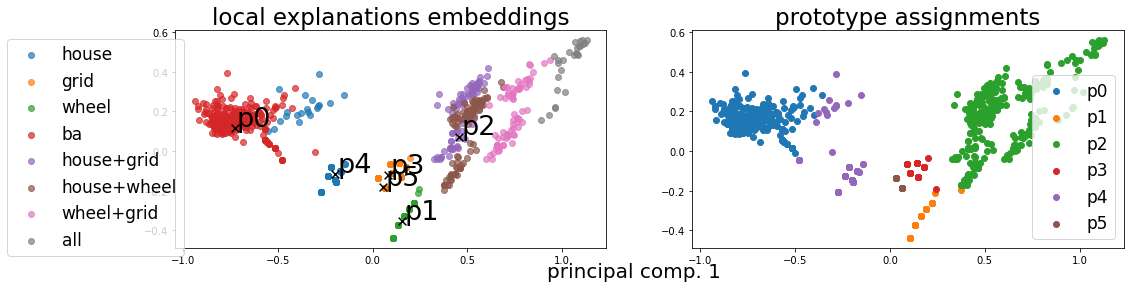

Alpha norms:
tensor([[0.4557, 0.4219, 1.0000, 0.4170, 0.3189, 0.5084],
        [0.1045, 0.2369, 1.0000, 0.2188, 0.2034, 0.1484]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.877578 +- 0.230623
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([253, 157, 278, 106, 119,  57], dtype=int64))
Logic formulas:
For class 0:
0.97875 (feature000) | (feature003) | (feature001) | ((feature004) | ((feature004 & feature000) | (feature005)
For class 1:
0.97875 (feature002) | (feature004 & feature003) | (feature005 & feature004) | (feature003 & feature001) | (feature005 & feature001) | (feature004 & feature001) | (feature005 & feature003) | (feature003 & feature002) | (feature004 & feature002) | (feature001 & feature002)
Accuracy as classifier:  0.9788
LEN fidelity:  tensor(0.9787)


460: Loss: 0.01067, LEN: 0.010248, AccxC: 0.97, AccO: 0.97, V. Acc: 0.98, V. Loss: 0.00821, V. LEN 0.01
461: Loss: 0.00967, LEN: 0.009356, AccxC: 0.97, AccO: 0.97, V. Acc: 0.95, V. Loss: 0.01388, 

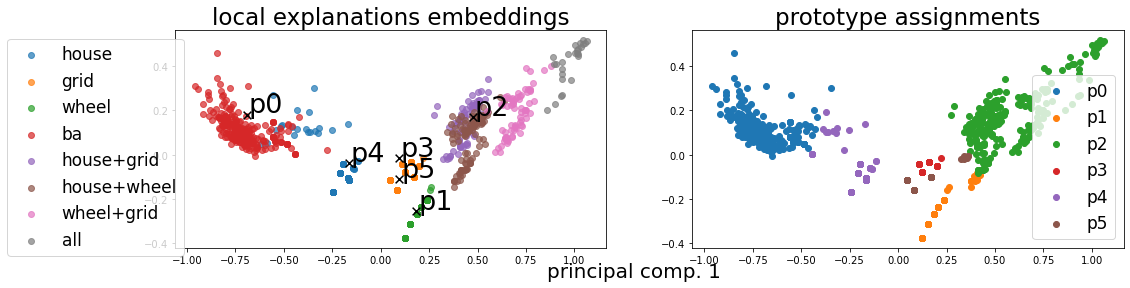

Alpha norms:
tensor([[0.4493, 0.4122, 1.0000, 0.4042, 0.3149, 0.4987],
        [0.1051, 0.2381, 1.0000, 0.2169, 0.2005, 0.1465]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.855873 +- 0.227237
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([256, 167, 263,  68, 116, 100], dtype=int64))
Logic formulas:
For class 0:
0.97125 (feature001) | (feature000) | (feature005) | ((feature004) | ((feature004 & feature000) | (feature003)
For class 1:
0.97125 (feature002) | (feature004 & feature003) | (feature005 & feature004) | (feature005 & feature001) | (feature003 & feature001) | (feature004 & feature001) | (feature004 & feature002) | (feature001 & feature002) | (feature003 & feature002)
Accuracy as classifier:  0.9712
LEN fidelity:  tensor(0.9712)


480: Loss: 0.01089, LEN: 0.010583, AccxC: 0.97, AccO: 0.97, V. Acc: 0.96, V. Loss: 0.01263, V. LEN 0.01
481: Loss: 0.00993, LEN: 0.009669, AccxC: 0.97, AccO: 0.97, V. Acc: 0.95, V. Loss: 0.01411, V. LEN 0.01
482: Loss: 0.010

In [15]:
train_group_loader = utils.build_dataloader(dataset_train, belonging_train, num_input_graphs=128)
val_group_loader   = utils.build_dataloader(dataset_val,   belonging_val, num_input_graphs=256)
test_group_loader  = utils.build_dataloader(dataset_test,  belonging_test, num_input_graphs=256)


torch.manual_seed(42)
len_model    = models.LEN(hyper_params["num_prototypes"], 
                          hyper_params["LEN_temperature"], 
                          remove_attention=hyper_params["remove_attention"]).to(device)
le_model     = models.LEEmbedder(num_features=hyper_params["num_le_features"], 
                                 activation=hyper_params["activation"], 
                                 num_hidden=hyper_params["dim_prototypes"]).to(device)
expl         = models.GLGExplainer(len_model, 
                                   le_model, 
                                   device=device, 
                                   hyper_params=hyper_params,
                                   classes_names=bamultishapes_classes_names,
                                   dataset_name=DATASET_NAME,
                                   num_classes=len(train_group_loader.dataset.data.task_y.unique())
                                  ).to(device)

expl.iterate(train_group_loader, val_group_loader, plot=True)

(array([0., 1., 2., 3., 4., 5., 6.], dtype=float32), array([17, 21, 18, 33,  9, 11, 11], dtype=int64))


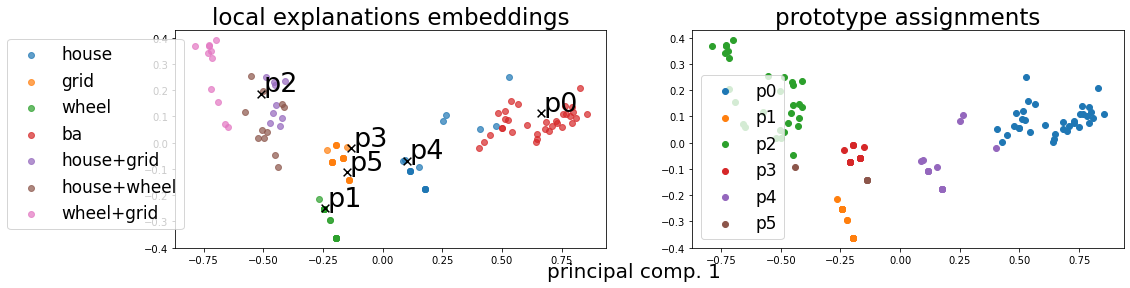

Alpha norms:
tensor([[0.4441, 0.4076, 1.0000, 0.3871, 0.3118, 0.4945],
        [0.1047, 0.2389, 1.0000, 0.2094, 0.2023, 0.1471]],
       grad_fn=<DivBackward0>)
Concept Purity: 0.835714 +- 0.220213
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([35, 18, 30, 17, 15,  5], dtype=int64))
Logic formulas:
For class 0:
0.98 (feature000) | (feature001) | (feature003) | ((feature004) | ((feature004 & feature000)
For class 1:
0.97 (feature002) | (feature004 & feature003) | (feature003 & feature001) | (feature005 & feature004) | (feature004 & feature001) | (feature005 & feature001)
Accuracy as classifier:  0.97
LEN fidelity:  tensor(0.9700)



In [16]:
expl.inspect(test_group_loader)

## Load Trained Model

(array([0., 1., 2., 3., 4., 5., 6., 7.], dtype=float32), array([121, 162, 157, 251,  78, 102,  73,  26], dtype=int64))
[0.8365361  0.13674673]


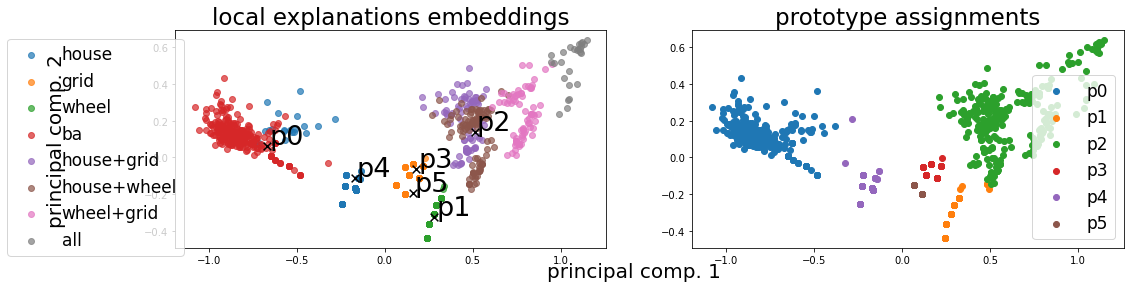

Alpha norms:
tensor([[0.4375, 0.3889, 1.0000, 0.3983, 0.2960, 0.4619],
        [0.0924, 0.1938, 1.0000, 0.1937, 0.1743, 0.1225]])
Concept Purity: 0.875196 +- 0.233278
Concept distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([269, 161, 275, 105, 103,  57], dtype=int64))
Logic formulas:
For class 0:
0.9775 (feature000) | (feature003) | (feature001) | ((feature004) | (feature005)
For class 1:
0.9775 (feature002) | (feature004 & feature003) | (feature005 & feature004) | (feature003 & feature001) | (feature005 & feature001) | (feature004 & feature001) | (feature004 & feature002) | (feature001 & feature002) | (feature003 & feature002)
Accuracy as classifier:  0.9775
LEN fidelity:  tensor(0.9775)



In [9]:
train_group_loader = utils.build_dataloader(dataset_train, belonging_train, num_input_graphs=128)
val_group_loader  = utils.build_dataloader(dataset_val, belonging_val, num_input_graphs=256)
test_group_loader = utils.build_dataloader(dataset_test, belonging_test, num_input_graphs=256)

len_model2    = models.LEN(hyper_params["num_prototypes"], 
                           hyper_params["LEN_temperature"], 
                           remove_attention=hyper_params["remove_attention"]).to(device)
le_model2     = models.LEEmbedder(num_features=hyper_params["num_le_features"], 
                                  activation=hyper_params["activation"], 
                                  num_hidden=hyper_params["dim_prototypes"]).to(device)
best_expl     = models.GLGExplainer(len_model2, 
                                    le_model2,                                        
                                    device, 
                                    hyper_params=hyper_params,
                                    classes_names=bamultishapes_classes_names,
                                    dataset_name=DATASET_NAME,
                                    num_classes=len(train_group_loader.dataset.data.task_y.unique())
                                  ).to(device)
best_expl.load_state_dict(torch.load("../trained_models/BAMultiShapes.pt"))
best_expl.eval()

best_expl.inspect(train_group_loader)

### materialize prototypes

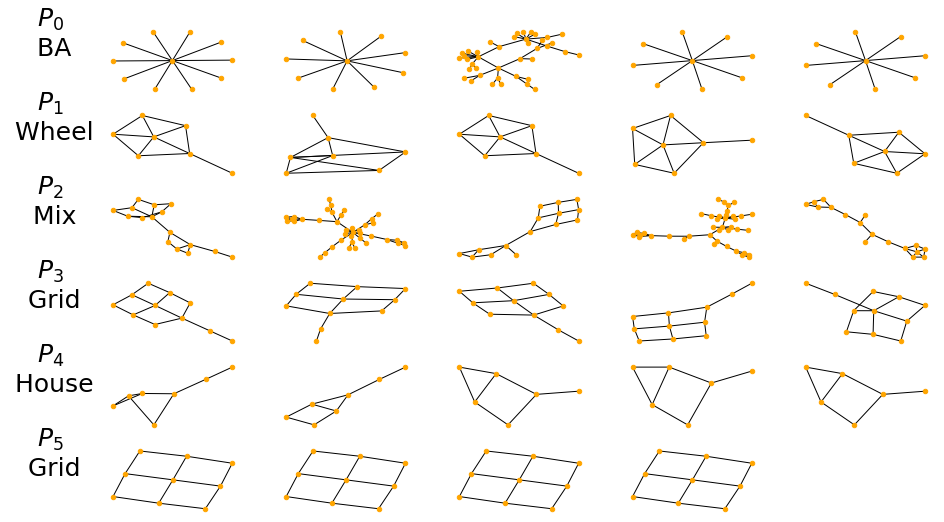

In [11]:
# change assign function to a non-discrete one just to compute distance between local expls. and prototypes
# useful to show the materialization of prototypes based on distance 
best_expl.hyper["assign_func"] = "sim"


x_train , emb , concepts_assignement , y_train_1h , le_classes , le_idxs , belonging = best_expl.get_concept_vector(test_group_loader, 
                                                                                                                    return_raw=True)        
best_expl.hyper["assign_func"] = "discrete"

proto_names = {
    0: "BA",
    1: "Wheel",
    2: "Mix",
    3: "Grid",
    4: "House",
    5: "Grid",
}
torch.manual_seed(42)
fig = plt.figure(figsize=(15,5*1.8))
n = 0
for p in range(best_expl.hyper["num_prototypes"]):
    idxs = le_idxs[concepts_assignement.argmax(-1) == p]
    #idxs = idxs[torch.randperm(len(idxs))]    # random 
    sa = concepts_assignement[concepts_assignement.argmax(-1) == p]
    idxs = idxs[torch.argsort(sa[:, p], descending=True)]
    for ex in range(min(5, len(idxs))):
        n += 1
        ax = plt.subplot(best_expl.hyper["num_prototypes"],5,n)      
        G = to_networkx(dataset_test[int(idxs[ex])], to_undirected=True)
        pos = nx.spring_layout(G, seed=42)
        nx.draw(G, pos, node_size=20, ax=ax, node_color="orange")
        ax.axis("on")
        plt.box(False)
        
for p in range(best_expl.hyper["num_prototypes"]):
    plt.subplot(best_expl.hyper["num_prototypes"],5,5*p + 1)
    plt.ylabel(f"$P_{p}$\n {proto_names[p]}", size=25, rotation="horizontal", labelpad=50)

plt.show() 